In [51]:
# importing the necessary headers and the data
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('Data/Ames_Housing_Sales.csv')

In [53]:
# Treat the categorical data types
mask = df.dtypes == np.object

In [54]:
# Cat data
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(exclude=['object'])

In [55]:
# Convert into dummy values
def dummyAndBind(df, attribute):
    dfvm = pd.get_dummies(df[attribute])
    df = pd.concat([df, dfvm], axis = 1)
    df = df.drop([attribute], axis = 1)
    return df

for i in df_cat.columns:
    df_cat = dummyAndBind(df_cat, '{}'.format(i))

In [56]:
df_cat.head()

,Grvl,None,Pave,1Fam,2fmCon,Duplex,Twnhs,TwnhsE,Fa,Gd,...,ConLD,ConLI,ConLw,New,Oth,WD,Grvl,Pave,AllPub,NoSeWa
0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,0


In [57]:
X = pd.concat([df_num, df_cat], axis = 1)

In [58]:
X.head(5)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,ConLD,ConLI,ConLw,New,Oth,WD,Grvl,Pave,AllPub,NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,0,0,0,0,0,1,0,1,1,0
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,0,0,0,0,0,1,0,1,1,0
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,0,0,0,0,0,1,0,1,1,0
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,0,0,0,0,0,1,0,1,1,0
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,0,0,0,0,0,1,0,1,1,0


In [59]:
# Target
y = X.SalePrice
X = X.drop(['SalePrice'], axis = 1)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 10) 

In [122]:
from sklearn.linear_model import Ridge
rc = Ridge(alpha=0.0001)
rc = rc.fit(X_train, y_train)
y_pred = rc.predict(X_val)

In [123]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_val)

0.872840990795577

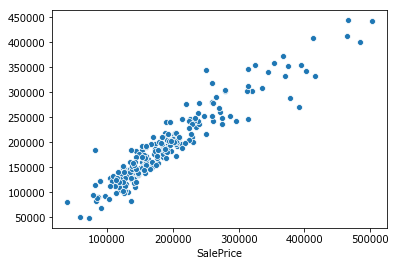

In [124]:
import seaborn as sns
%matplotlib inline

sns.scatterplot(y_val,y_pred)

In [125]:
from sklearn.linear_model import Lasso
rc = Lasso(alpha=0.0001)
rc = rc.fit(X_train, y_train)
y_pred = rc.predict(X_val)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [126]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_val)

0.8699571187943985

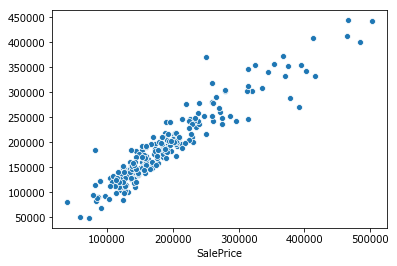

In [127]:
import seaborn as sns
%matplotlib inline

sns.scatterplot(y_val,y_pred)

In [156]:
from sklearn.linear_model import ElasticNet
rc = ElasticNet(alpha=0.0001,l1_ratio=0.5)
rc = rc.fit(X_train, y_train)
y_pred = rc.predict(X_val)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [157]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_val)

0.8702651312572645

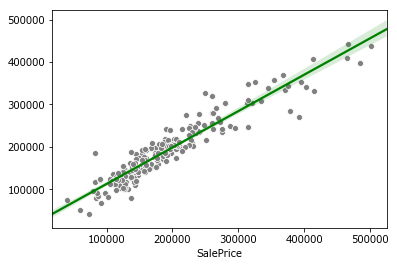

In [171]:
import seaborn as sns
%matplotlib inline

sns.scatterplot(y_val,y_pred,color='gray')
sns.regplot(y_val,y_pred, scatter=False, color='green')